## 규제 선형 회귀(릿지,라쏘,엘라스틱넥 )

- 규제(Legulation)
    - L1 규제: +aㅣwㅣ
        - feature를 제거 할 수 있다
        - Lasso
    - L2 규제: +aㅣwㅣ^2
        - feature을 제거 할 수 없고, 제약을 줄 수 있다
        - Ridge

## sklearn.linear_model.Ridge
* class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)
* 

In [58]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

boston_df=pd.read_csv("../datasets/Boston.csv",index_col=0)
y_target=boston_df['medv']
X_data= boston_df.drop('medv',axis=1)

#릿지 클래스
ridge= Ridge(alpha=10)
neg_mse_scores= cross_val_score(ridge, X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse =np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ',np.round(neg_mse_scores,3))
print('5 folds의 개별 NMSE scores :',np.round(rmse_scores,3))
print(f'5 folds의 평균 RMSE:{avg_rmse:.3f}')


5 folds의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 NMSE scores : [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE:5.518


In [59]:
# alpha 값을 0,0,1,1,10,100으로 변경하면서 RMSE값 측정

alphas=[0, 0.1 ,1 ,10 ,100]

for alpha in alphas:
    ridge= Ridge(alpha=alpha)

    neg_mse_scores= cross_val_score(ridge, X_data,y_target,scoring='neg_mean_squared_error',cv=5)
    avg_rmse =np.mean(np.sqrt(-1*neg_mse_scores))
    print(f'alpha {alpha:1f}일 때 5 folds의 평균 RMSE:{avg_rmse:.3f}')


alpha 0.000000일 때 5 folds의 평균 RMSE:5.829
alpha 0.100000일 때 5 folds의 평균 RMSE:5.788
alpha 1.000000일 때 5 folds의 평균 RMSE:5.653
alpha 10.000000일 때 5 folds의 평균 RMSE:5.518
alpha 100.000000일 때 5 folds의 평균 RMSE:5.330


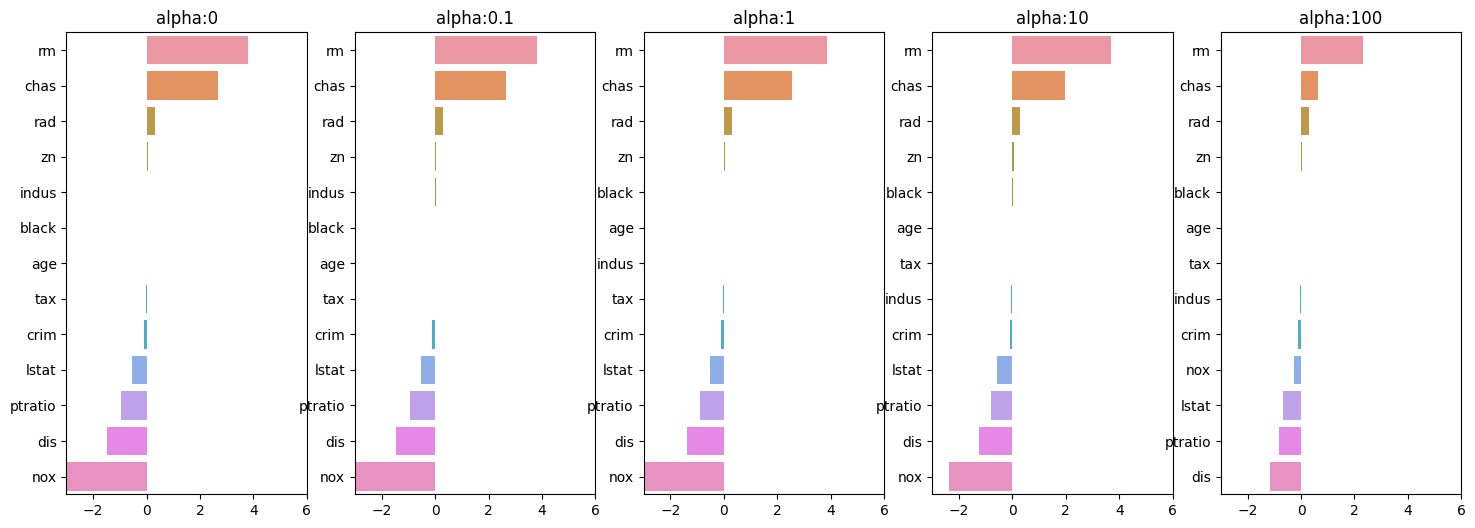

In [60]:
# 각 aplha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯릿 축 생성
fig,axs =plt.subplots(figsize=(18,6),nrows=1,ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계쑤 값 시각화 밑 데이터 저장, pos는 axis위치 지정
for pos,alpha in enumerate(alphas):
    ridge= Ridge(alpha=alpha)
    ridge.fit(X_data,y_target)
    # alpha에 따른 피쳐별 회귀 계수를 series로 변환하고 이를 DataFrame 의 칼럼으로 추가
    coeff=pd.Series(data=ridge.coef_,index=X_data.columns)
    colname ='alpha:'+str(alpha)
    coeff_df[colname]=coeff
    # 막대 그래프로 각 aplha값에서의 회귀 계수를 시각화, 회귀 계수값이 높은 순으로 표현
    coeff=coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index,ax=axs[pos])

# for문 밖에서 맷플롯릿의 show호출 및 alpha에 따른 피쳐별 회귀 계수를 DataFrame으로 표시
plt.show()

In [61]:
# 알파값에 따른 회귀 계수 출력
ridge_alphas =[0, 0.1 ,1 ,10 ,100]
sort_column ='alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
nox,-17.766611,-16.684645,-10.777015,-2.371619,-0.262847
dis,-1.475567,-1.459626,-1.372654,-1.248808,-1.153390
ptratio,-0.952747,-0.940759,-0.876074,-0.797945,-0.829218
lstat,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764
crim,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
tax,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
age,0.000692,-0.000269,-0.005415,-0.010707,0.001212
black,0.009312,0.009368,0.009673,0.010037,0.009393
indus,0.020559,0.015999,-0.008805,-0.042962,-0.052826
zn,0.046420,0.046572,0.047443,0.049579,0.054496


In [62]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

# boston 데이터셋 로드
bostondf = pd.read_csv('../datasets/Boston.csv', index_col=0)

# boston dataset의 target array는 주택 가격. price 컬럼으로 설정
bostondf.rename(columns = {'medv':'price'},inplace=True)

y_target = bostondf['price']
X_data = bostondf.drop(['price'],axis=1,inplace=False)



# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고, 회귀 계수값들을 DataFrame으로 반환해주는 함수
def get_linear_reg_eval(model_name, params=None, X_data_n = None, y_target_n = None, verbose=True) :
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name, '#######')
    for param in params :
        if model_name =='Ridge' : 
            model = Ridge(alpha = param)
        elif model_name == 'Lasso' : 
            model = Lasso(alpha = param)
        elif model_name == 'ElasticNet' : 
            model = ElasticNet(alpha = param, l1_ratio = 0.7)

        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print(f'alpha {param}일 때, 5 fold 세트의 평균 RMSE: {avg_rmse : .3f}')
        # cross_val_score는 evaluation metirc만 반환하므로 모델을 다시 학습하여 회귀계수 추출
        model.fit(X_data, y_target)
        # alpha에 따른 피처별 회귀계수를 Series로 변환하고, 이를 DF의 컬럼으로 추가
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = 'alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
    

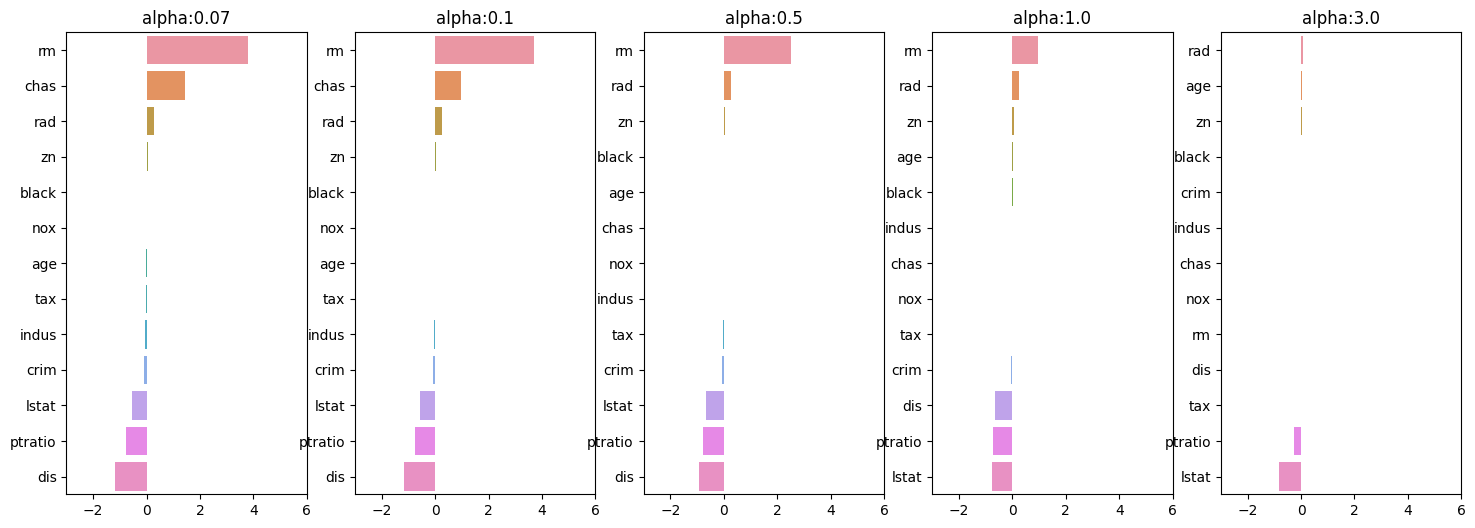

In [63]:
lasso_alphas = [0.07, 0.1, 0.5, 1.0, 3.0]
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플로립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, lasso_alphas in enumerate(lasso_alphas) :
    lasso = Lasso(alpha = lasso_alphas)
    lasso.fit(X_data, y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    coeff = pd.Series(data=lasso.coef_, index=X_data.columns)
    colname = 'alpha:' + str(lasso_alphas)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False) # 회귀 계수 값이 높은 순으로 정렬
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for문 바깥에서 맷롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [64]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때, 5 fold 세트의 평균 RMSE:  5.612
alpha 0.1일 때, 5 fold 세트의 평균 RMSE:  5.615
alpha 0.5일 때, 5 fold 세트의 평균 RMSE:  5.669
alpha 1일 때, 5 fold 세트의 평균 RMSE:  5.776
alpha 3일 때, 5 fold 세트의 평균 RMSE:  6.189


In [65]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀 계수 DataFrame 출력
sort_column= 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
rm,3.789725,3.703202,2.498212,0.949811,0.000000
chas,1.434343,0.955190,0.000000,0.000000,0.000000
rad,0.270936,0.274707,0.277451,0.264206,0.061864
zn,0.049059,0.049211,0.049544,0.049165,0.037231
black,0.010248,0.010249,0.009469,0.008247,0.006510
nox,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
age,-0.011706,-0.010037,0.003604,0.020910,0.042495
tax,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
indus,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
crim,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [66]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때, 5 fold 세트의 평균 RMSE:  5.542
alpha 0.1일 때, 5 fold 세트의 평균 RMSE:  5.526
alpha 0.5일 때, 5 fold 세트의 평균 RMSE:  5.467
alpha 1일 때, 5 fold 세트의 평균 RMSE:  5.597
alpha 3일 때, 5 fold 세트의 평균 RMSE:  6.068


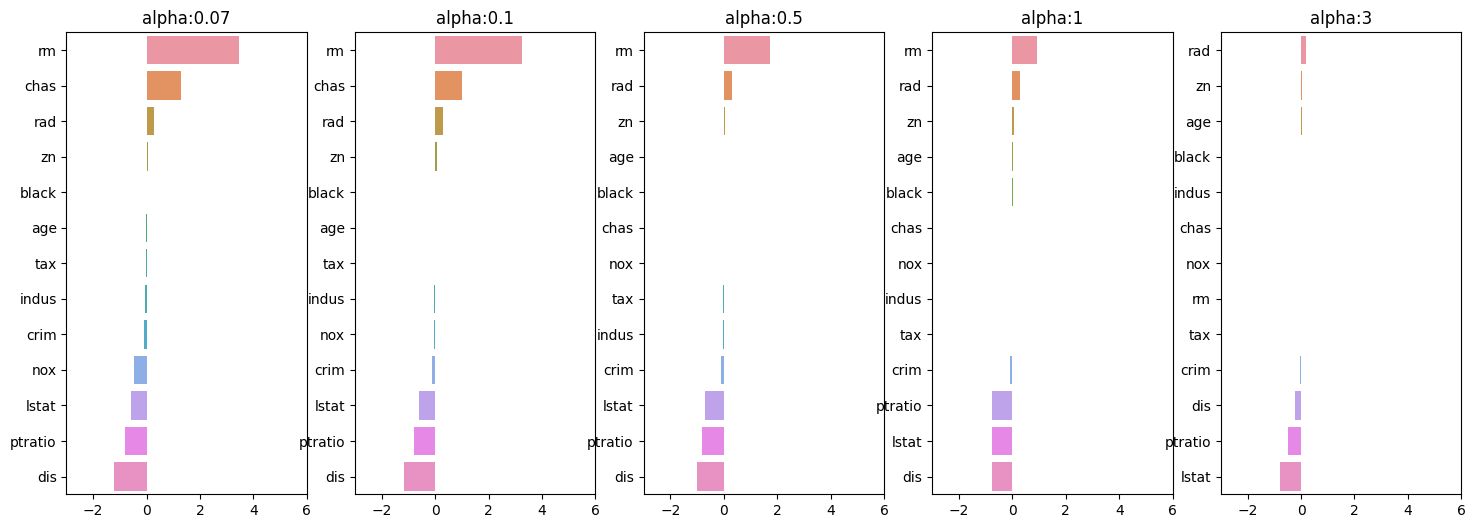

In [67]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]

import matplotlib.pyplot as plt
import seaborn as sns
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플로립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, elastic_alphas in enumerate(elastic_alphas) :
    elastic = ElasticNet(alpha = elastic_alphas)
    elastic.fit(X_data, y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    coeff = pd.Series(data=elastic.coef_, index=X_data.columns)
    colname = 'alpha:' + str(elastic_alphas)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False) # 회귀 계수 값이 높은 순으로 정렬
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for문 바깥에서 맷롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

#### 성능 비교하기
    - 원본 데이터
    - 표준 정규 분포
    - 표준 정규 분포 +2차 다항식
    - 최솟값/최댓값 정규화
    - 최솟값/최댓값 정규화 + 2차 다항식
    - 로그 변환

    * 후에 비교 방법(Lasso,Ridge,ElasticNet) ---> alpha값 비교하면서 성능 비교해 보기

In [68]:
## 데이터 전처리(정규화,로그 변환)을 해주는 함수
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures

def get_scaled_data(method='None',p_dgree=None,input_data=None):
    if method == 'standard':
        scaled_data= StandardScaler().fit_transform(input_data)
    elif method =='MinMax':
        scaled_data= MinMaxScaler().fit_transform(input_data)
    elif method =='Log':
        scaled_data=np.log1p(input_data)
    else:
        scaled_data =input_data
    
    if p_dgree != None:
        scaled_data= PolynomialFeatures(degree=p_dgree,include_bias=False).fit_transform(scaled_data)

    return scaled_data

In [69]:
###  결론!
# Ridge의 alpha 값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출
alphas =[0.1,1,10,100]

scaled_methods=[(None, None),('Standard', None),('Standard', 2),('MinMax', None),('MinMax', 2),('Log', None)]

for scale_method in scaled_methods:
    X_data_scaled= get_scaled_data(method=scale_method[0],p_dgree=scale_method[1],input_data=X_data)
    print('\n## 변환 유형:{0}일때 ,Polynomial Degree:{1}'.format(scale_method[0],scale_method[1]) )

    get_linear_reg_eval('Ridge',params=alphas, X_data_n=X_data_scaled,y_target_n=y_target,verbose=False)


## 변환 유형:None일때 ,Polynomial Degree:None
alpha 0.1일 때, 5 fold 세트의 평균 RMSE:  5.788
alpha 1일 때, 5 fold 세트의 평균 RMSE:  5.653
alpha 10일 때, 5 fold 세트의 평균 RMSE:  5.518
alpha 100일 때, 5 fold 세트의 평균 RMSE:  5.330

## 변환 유형:Standard일때 ,Polynomial Degree:None
alpha 0.1일 때, 5 fold 세트의 평균 RMSE:  5.788
alpha 1일 때, 5 fold 세트의 평균 RMSE:  5.653
alpha 10일 때, 5 fold 세트의 평균 RMSE:  5.518
alpha 100일 때, 5 fold 세트의 평균 RMSE:  5.330

## 변환 유형:Standard일때 ,Polynomial Degree:2
alpha 0.1일 때, 5 fold 세트의 평균 RMSE:  9.141
alpha 1일 때, 5 fold 세트의 평균 RMSE:  8.938
alpha 10일 때, 5 fold 세트의 평균 RMSE:  10.556
alpha 100일 때, 5 fold 세트의 평균 RMSE:  10.566

## 변환 유형:MinMax일때 ,Polynomial Degree:None
alpha 0.1일 때, 5 fold 세트의 평균 RMSE:  5.764
alpha 1일 때, 5 fold 세트의 평균 RMSE:  5.465
alpha 10일 때, 5 fold 세트의 평균 RMSE:  5.754
alpha 100일 때, 5 fold 세트의 평균 RMSE:  7.635

## 변환 유형:MinMax일때 ,Polynomial Degree:2
alpha 0.1일 때, 5 fold 세트의 평균 RMSE:  5.298
alpha 1일 때, 5 fold 세트의 평균 RMSE:  4.323
alpha 10일 때, 5 fold 세트의 평균 RMSE:  5.185
alpha 100일 때, 5 fold 세트

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# boston 데이터셋 로드
bostondf = pd.read_csv('../datasets/Boston.csv', index_col=0)

# boston dataset의 target array는 주택 가격. price 컬럼으로 설정
bostondf.rename(columns = {'medv':'price'},inplace=True)

y_target = bostondf['price']
X_data = bostondf.drop(['price'],axis=1,inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 folds 의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
 5 folds 의 평균 RMSE : 4.423 


In [72]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv =5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### {0} #####'.format(model))
    print("avg socres : ", np.round(avg_rmse, 3))

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

##### DecisionTreeRegressor(max_depth=4, random_state=0) #####
avg socres :  5.978
##### RandomForestRegressor(n_estimators=1000, random_state=0) #####
avg socres :  4.423
##### GradientBoostingRegressor(n_estimators=1000, random_state=0) #####
avg socres :  4.269


<Axes: >

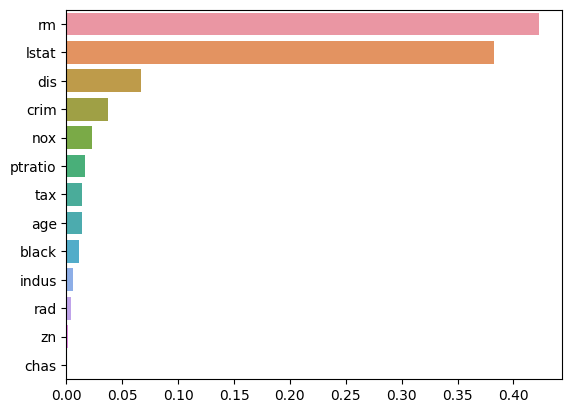

In [74]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습한다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


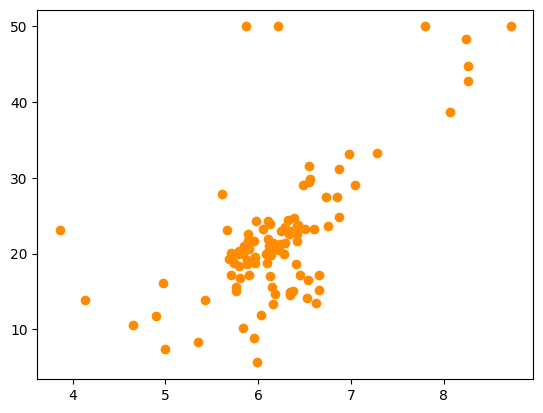

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

bostondf_sample = bostondf[['rm', 'price']]
bostondf_sample = bostondf_sample.sample(n=100, random_state=0)
print(bostondf_sample.shape)
plt.figure()
plt.scatter(bostondf_sample.rm, bostondf_sample.price, c='darkorange')

In [76]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5~8.5까지 100개 데이터 셋 생성.
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 rm만, 그리고 결정 데이터인 price 추출
X_feature = bostondf_sample['rm'].values.reshape(-1,1)
y_target = bostondf_sample['price'].values.reshape(-1,1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

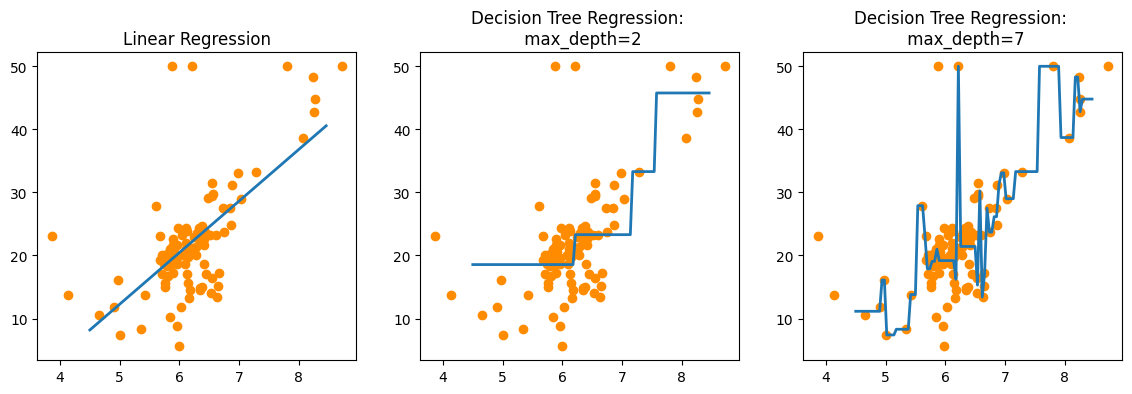

In [77]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5~8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostondf_sample.rm, bostondf_sample.price, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostondf_sample.rm, bostondf_sample.price, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:2', linewidth=2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostondf_sample.rm, bostondf_sample.price, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:2', linewidth=2)